# Table of Contents

1. [Gender Pay Gap Analysis in Ohio State University](#1-gender-pay-gap-analysis-in-ohio-state-university)
2. [Import Necessary Libraries](#2-import-necessary-libraries)
3. [Load and Examine the Dataset](#3-load-and-examine-the-dataset)
4. [About the dataset](#4-about-the-dataset)
5. [Gender Distribution Overview](#4-gender-distribution-overview)
6. [Gross Pay and Gender](#5-gross-pay-and-gender)
   - 6.1 [Mean Gross Pay by Gender](#51-mean-gross-pay-by-gender)
   - 6.2 [Distribution of Gross Pay Categories](#52-distribution-of-gross-pay-categories)
   - 6.3 [Distribution of Gross Pay & Gender Categories](#53-distribution-of-gross-pay--gender-categories)
   - 6.4 [Mean and Median Gross Pay by Gender and Position Group](#54-mean-and-median-gross-pay-by-gender-and-position-group)
7. [Gender Pay Gap Analysis between Gross Pay, Bonuses, Overtime, and Gender](#6-gender-pay-gap-analysis-between-gross-pay-bonuses-overtime-and-gender)
   - 7.1 [Create Contingency Tables](#61-create-contingency-tables)
     - 7.1.1 [Regular Pay](#611-regular-pay)
     - 7.1.2 [Bonus](#612-bonus)
     - 7.1.3 [Other Compensation](#613-other-compensation)
     - 7.1.4 [Overtime](#614-overtime)
   - 7.2 [Visualize](#62-visualize)
   - 7.3 [Observations](#63-observations)
   - 7.4 [Conclusions](#631-conclusions)
8. [Tests](#7-tests)
   - 8.1 [Chi-Square Test](#71-chi-square-test)
   - 8.2 [Mann-Whitney Test](#72-mann-whitney-test)
9. [Gender Pay Gap Analysis by Position Group](#8-gender-pay-gap-analysis-by-position-group)
   - 9.1 [Create a Dataset](#81-create-a-dataset)
   - 9.2 [First Look](#82-first-look)
   - 9.3 [Gross Pay](#83-gross-pay)
     - 9.3.1 [Distribution of Gross Pay Categories](#831-distribution-of-gross-pay-categories)
     - 9.3.2 [Viz 1](#832-viz-1)
     - 9.3.3 [Viz 2](#833-viz-2)
     - 9.3.4 [Observations](#834-observations)
   - 9.4 [Overtime](#84-overtime)
     - 9.4.1 [Distribution of Overtime Categories](#841-distribution-of-overtime-categories)
     - 9.4.2 [Viz 1](#842-viz-1)
     - 9.4.3 [Viz 2](#843-viz-2)
     - 9.4.4 [Remove Values Below Zero](#844-remove-values-below-zero)
     - 9.4.5 [Observations](#845-observations)
10. [General Conclusion](#9-general-conclusion)
11. [Recommendations](#10-recommendations)


# Gender Pay Gap Analysis in Ohio State University
This analysis will help us understand if there are any significant disparities in earnings between different genders, identify patterns and potential inequalities that might exist within OSU. Additionally, this analysis will provide insights into how gender may influence earnings and highlight areas where improvements can be made to ensure fair compensation practices.

<a name="2-import-necessary-libraries"></a>
# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.options.mode.copy_on_write = True

<a name="3-load-and-examine-the-dataset"></a>
# Load and examine the dataset

In [3]:
df = pd.read_excel("Data/OSU-2023-Earnings-Cleaned.xlsx")

<a name="4-about-the-dataset"></a>
# About the dataset
`The Ohio State University 2023 Combined Earnings` dataset is taken from its website at https://apps.hr.osu.edu/salaries/

**It has been changed to suit analysis purposes.**

**Statistics and Reports**\
The Office of Human Resources provides analysis and reporting of human resources management information, including demographics, internal and external markets for faculty and staff salaries, and mandated federal and state reporting.

**Earnings**\
Earnings dataset includes all non-student employees’ regular, overtime, bonus and sick leave/vacation payout for the timeframe. For individuals with more than one job title/appointment, their earnings are listed in the area that corresponds to their primary appointment.

**About the Data**\
Amounts represent paid earnings, including corrections to prior payrolls and in some cases may reflect negative values.
- Regular: components of the employee’s regular pay, including paid leave
- Overtime: includes call back pay, FLSA premium and holiday pay (worked)
- Bonus: includes staff award, STEP faculty and STEP staff
- Other: remaining components of the employee’s pay

**Form Field Definitions**\
Database: Differentiates positions associated with the Wexner Medical Center/Health System, Athletics, and the rest of the university.
The Ohio State Athletics Department operates a self-sustaining budget, receiving no University general funds, student fees or state tax support.
The Wexner Medical Center/Health System operates a self-sustaining budget, receiving no University general funds, student fees or state tax support.

Resulting Data: Earnings data includes all non-student employees’ regular, overtime, bonus and sick leave/vacation payout for 2023. For individuals with more than one job title/appointment, their earnings are listed in the area that corresponds to their primary appointment.

**The modified file contains the following columns:**
- full_name
- gender
- position_group
- job hierarchy
- cost_center
- regular_pay
- bonus
- other
- overtime
- gross_paynt.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41887 entries, 0 to 41886
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       41887 non-null  object 
 1   gender          41887 non-null  object 
 2   position_group  41887 non-null  object 
 3   job             41887 non-null  object 
 4   hierarchy       41887 non-null  object 
 5   cost_center     41887 non-null  object 
 6   regular_pay     41887 non-null  float64
 7   bonus           41887 non-null  float64
 8   other           41887 non-null  float64
 9   overtime        41887 non-null  float64
 10  gross_pay       41887 non-null  float64
dtypes: float64(5), object(6)
memory usage: 3.5+ MB


In [5]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,regular_pay,bonus,other,overtime,gross_pay
count,41887.00,41887.00,41887.00,41887.00,41887.00
mean,68786.18,2340.08,2783.56,1081.56,74991.38
std,74811.14,16091.00,37499.63,4256.52,100273.81
min,-2185.73,-1000.00,-2500.00,-14.99,0.02
25%,27608.19,0.00,0.00,0.00,29155.01
50%,55040.43,0.00,0.00,0.00,57726.00
75%,87366.13,600.00,17.88,192.47,91459.01
max,2433750.06,1385737.50,6923462.58,152487.38,9173462.62


<a name="4-gender-distribution-overview"></a>
# Gender distribution overview

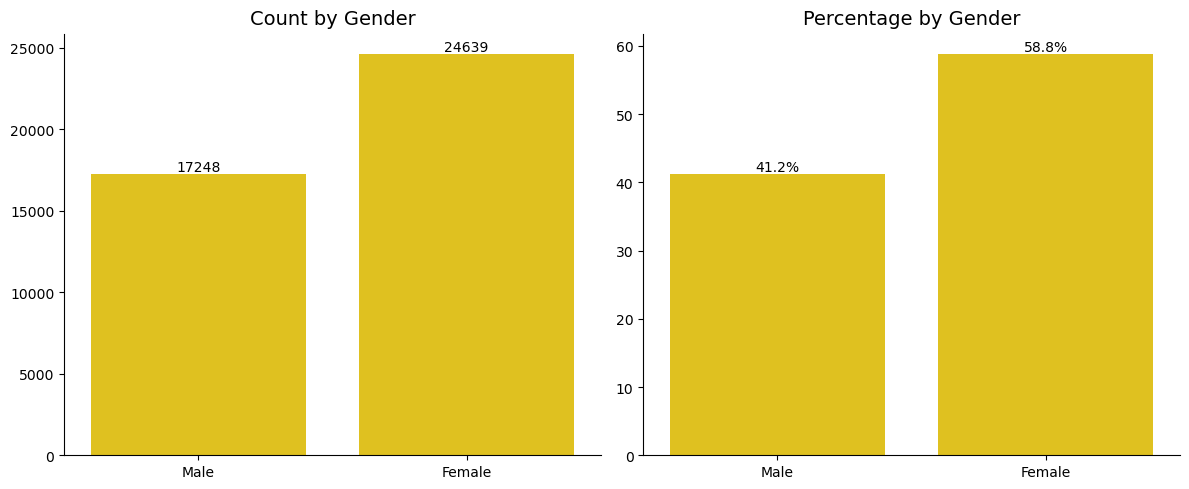

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=False, sharex=True, tight_layout = True)
sns.despine(fig)

p1= sns.countplot(x ='gender', data = df, color = 'gold', ax=ax[0])
for container in p1.containers:
    ax[0].bar_label(container, fontsize=10)

p2 = sns.countplot(x ='gender', data = df, color = 'gold', stat = 'percent', ax=ax[1] )
for container in p2.containers:
    ax[1].bar_label(container, fontsize=10, fmt= '{:.1f}%')

p1.set(xlabel='', ylabel='')
p2.set(xlabel='', ylabel='')
ax[0].set_title('Count by Gender', pad = 7, fontsize=14)
ax[1].set_title('Percentage by Gender', pad = 7, fontsize=14)
plt.show()

**Observations:**

The dataset contains more females (24,639; 58.8%) than males (17,248; 41.2%), indicating a higher representation of females.

<a name="5-gross-pay-and-gender"></a>
# Gross Pay and Gender

In [7]:
# Create a dataframe for gender
df1 = df[['gender','regular_pay','bonus','other','overtime','gross_pay']]

## Gross Pay distribution

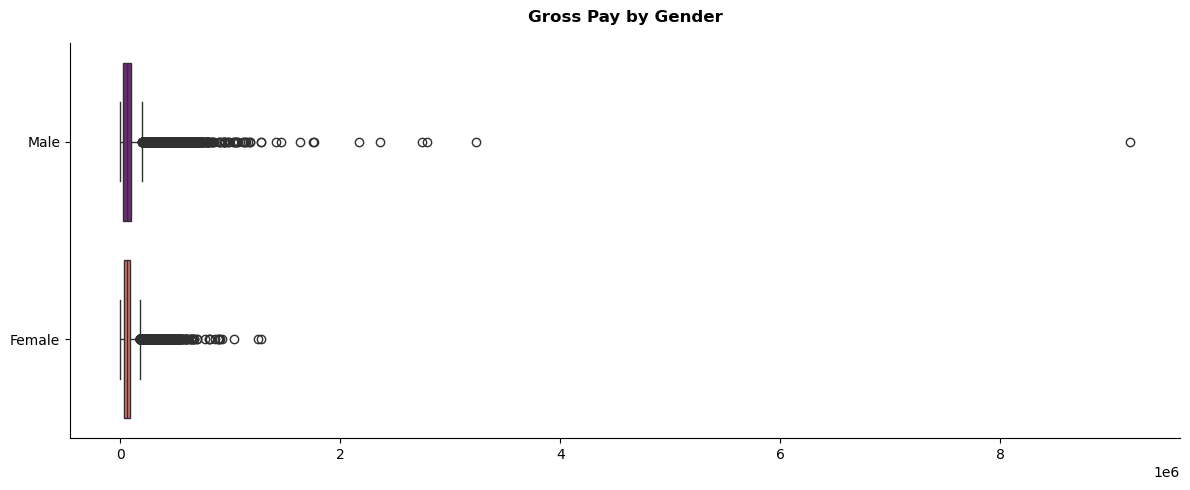

In [8]:
# boxplot by gender
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.boxplot(x=df1.gross_pay, y = df1.gender, palette = "magma")
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Gross Pay by Gender', pad = 15, fontweight ='bold')
plt.show()

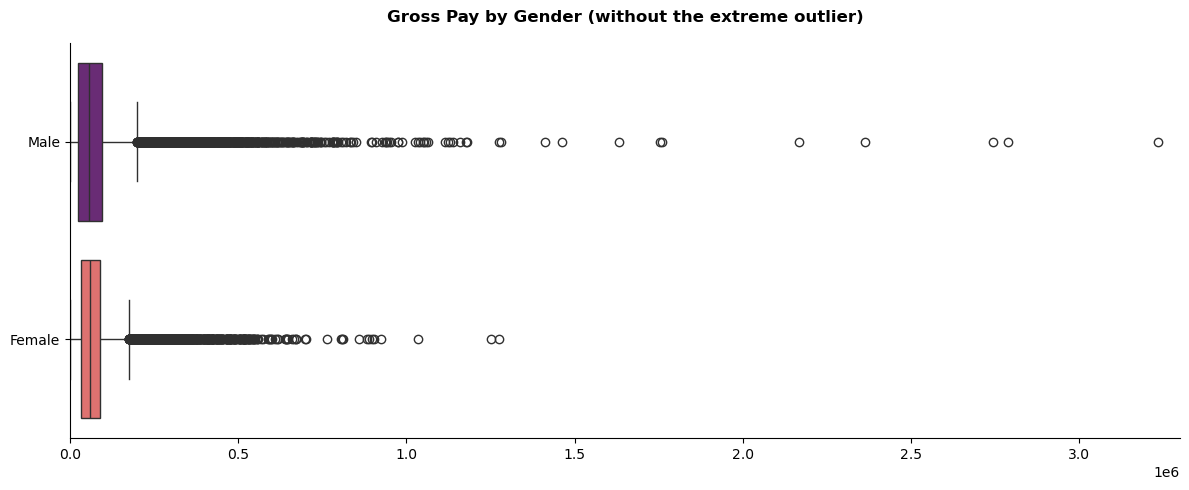

In [9]:
# remove one extreme outlier to better visualize
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.boxplot(x=df1.gross_pay, y = df1.gender, palette = "magma")
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Gross Pay by Gender (without the extreme outlier)', pad = 15, fontweight ='bold')
ax.set_xlim(0, 3300000)
plt.show()

**Observations:**
- The median pay for both genders appears roughly equal.
- The range for males, including outliers, extends significantly higher than the female range. This suggests that the highest earners are male.
- The spread of pay is wider for males, indicating more variability in their earnings compared to females who have a more compact distribution, suggesting less variation in pay.  

## Mean Gross Pay by Gender

In [10]:
average_salary = df.groupby(["gender"])["gross_pay"].mean().reset_index().sort_values(by='gross_pay', ascending=False)
average_salary

,gender,gross_pay
1,Male,82573.179421
0,Female,69683.903712


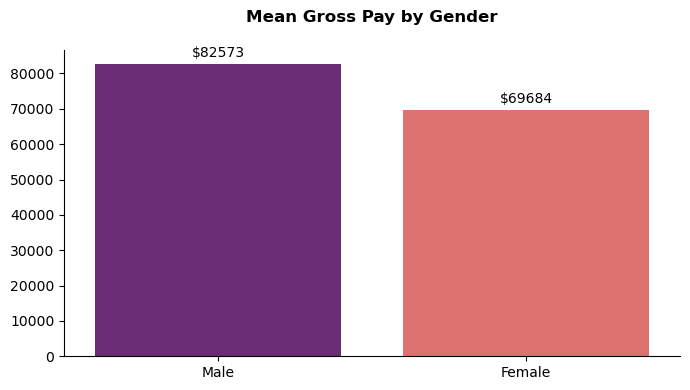

In [11]:
fig = plt.figure(figsize = (7,4), tight_layout = True)
ax = sns.barplot(x='gender', y='gross_pay', data = df, estimator=np.mean, errorbar = None, palette = "magma")
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3,fmt='$%0.f')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Mean Gross Pay by Gender', pad = 20, fontweight ='bold')
plt.show()

A very pronounced gender pay disparity can be observed here.

## Distribution of Gross Pay Categories

In [12]:
# Discretize variables into buckets
bins = [0, 25000, 50000, 75000, 100000, 150000, 350000, 500000, 1000000, 10000000]
labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-350K', '350K-500K', '500K-1M', '1M-10M']
df1['gross_pay_c'] = pd.cut(df1['gross_pay'], bins, labels= labels)

# Create a contingency table
cross_gross = pd.crosstab(df1.gross_pay_c, df1.gender, normalize='columns')*100

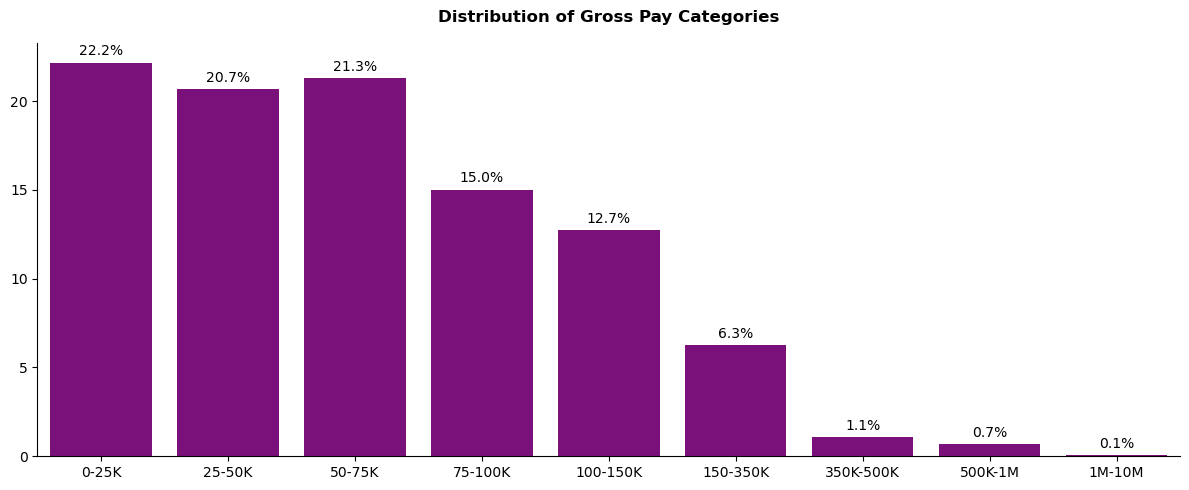

In [13]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.countplot(x ='gross_pay_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Distribution of Gross Pay Categories', pad = 15, fontweight ='bold')
plt.show()

**Observations:**
- The distribution is skewed towards the lower pay ranges, with over 60% of employees earning under 75K.
- A relatively small percentage of employees are in the highest pay ranges, indicating that higher salaries (above 150K) are rare in this dataset reflecting a typical salary distribution where a smaller number of employees earn higher wages.
- The concentration of salaries in the lower pay brackets may suggest a wage disparity across different positions or departments.

## Distribution of Gross Pay & Gender Categories

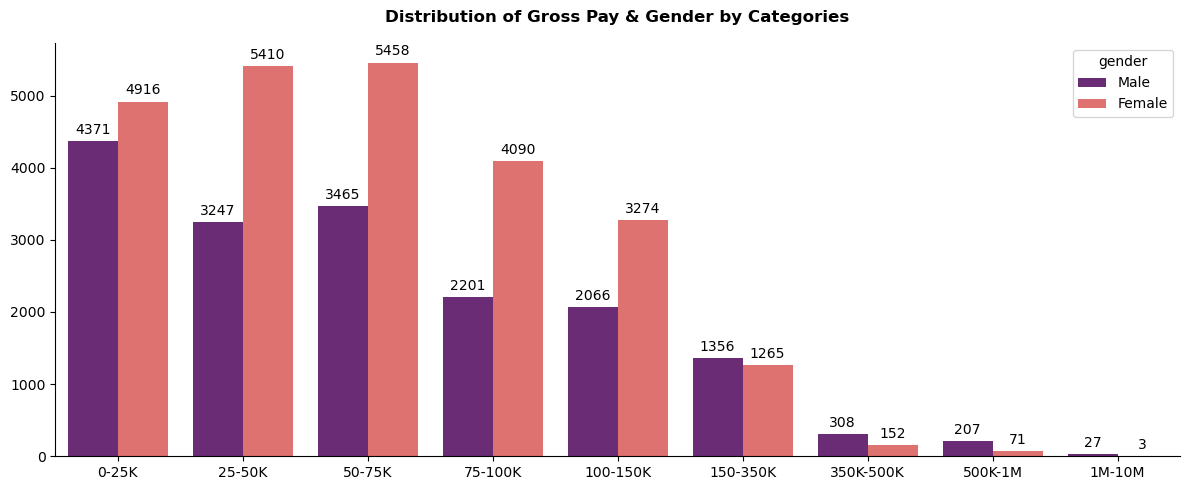

In [14]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.countplot(x ='gross_pay_c', hue = "gender", data = df1, palette = "magma")
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Distribution of Gross Pay & Gender by Categories', pad = 15, fontweight ='bold')
plt.show()

**Observations:**

The chart shows that while females are more prevalent in low-to-mid salary ranges, males increasingly dominate higher gross pay brackets, especially in the top earning categories, indicating a gender disparity in higher-paying roles.

## Mean and Median Gross Pay By Gender and Position Group

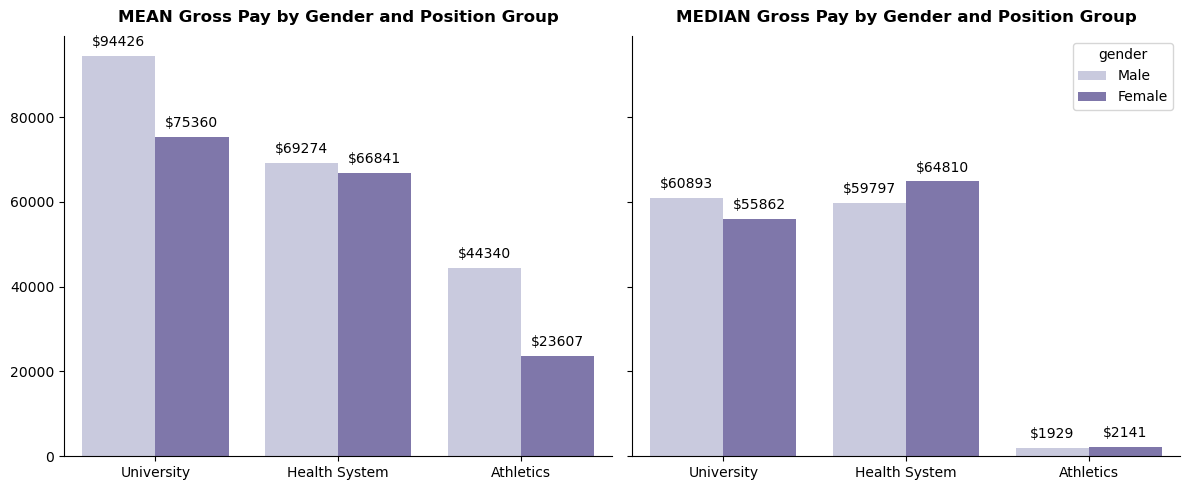

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True, tight_layout = True)
ax = sns.barplot(ax=axes[0], x='position_group', y='gross_pay', hue='gender', data=df, 
                 estimator=np.mean, errorbar = None, palette = "Purples")
for i in ax.containers:
    ax.bar_label(i, fontsize=10, padding=5, fmt='$%0.f')
axes[0].set_title('MEAN Gross Pay by Gender and Position Group', pad = 10, fontweight ='bold')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_legend().set_visible(False)

ax2 = sns.barplot(ax=axes[1], x='position_group', y='gross_pay', hue='gender', data=df, 
                  estimator=np.median, errorbar = None, palette = "Purples")
for i in ax2.containers:
    ax2.bar_label(i, fontsize=10, padding=5, fmt='$%0.f')
axes[1].set_title('MEDIAN Gross Pay by Gender and Position Group', pad = 10, fontweight ='bold')
ax2.set(xlabel='', ylabel='')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

**Observations:**

Gender Pay Gap: In all three groups (University, Health System, and Athletics), males consistently earn more than females (excluding the median in Health System), although the size of the gap varies significantly.
- `University`: The gender pay gap is present in both mean and median pay, with males earning more.
- `Health System` positions have the smallest gender gap, and the median indicates females earn slightly more.
- `Athletics`: There is a significant difference in mean pay between genders, but the median pay is relatively similar, indicating that outliers may be skewing the mean.

These observations point to a persistent gender pay gap across different position groups, with certain sectors (like Athletics) showing a much more severe disparity than others.

<a name="6-gender-pay-gap-analysis-between-gross-pay-bonuses-overtime-and-gender"></a>
# Gender Pay Gap Analysis between Gross Pay, Bonuses, Overtime and Gender
This analysis aims to understand the relationship between Gross Pay, Bonuses, Overtime between different genders at Ohio State University (OSU). The goal is to identify patterns and potential inequalities in compensation, understand how gender influences earnings, and highlight areas for improvement to ensure fair compensation practices.

## Create contingency tables

### Regular Pay

In [16]:
# Discretize variables into buckets
bins = [-2200, 0, 25000, 50000, 75000, 100000, 150000, 300000, 2500000]
labels = ['< 0', '0-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-300K', '300K-2.5M']
df1['regular_pay_c'] = pd.cut(df1['regular_pay'], bins, labels= labels)

# Create a contingency table
cross_reg = pd.crosstab(df1.regular_pay_c, df1.gender, normalize='columns')*100

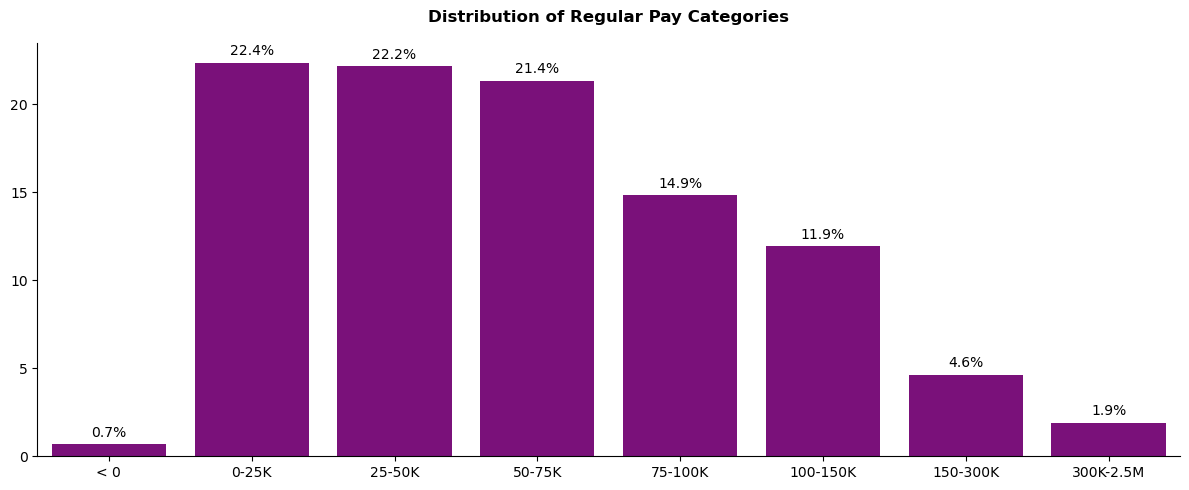

In [17]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
p1 = sns.countplot(x ='regular_pay_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in p1.containers:
    p1.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
p1.set(xlabel='', ylabel='')
p1.spines["top"].set_visible(False)
p1.spines["right"].set_visible(False)
p1.set_title('Distribution of Regular Pay Categories', pad = 15, fontweight ='bold')
plt.show()

### Bonus

In [18]:
# Discretize variables into equal-sized buckets
bins = [-1100, 0, 500, 750, 1000, 3000, 5000, 10000, 50000, 1500000]
labels = ['< 0', '0-500', '500-750', '750-1K', '1-3K', '3-5K','5-10K', '10-50K', '50K-1.5M']
df1['bonus_c'] = pd.cut(df1['bonus'], bins, labels= labels)

# Create a contingency table
cross_bonus = pd.crosstab(df1.bonus_c, df1.gender, normalize='columns')*100

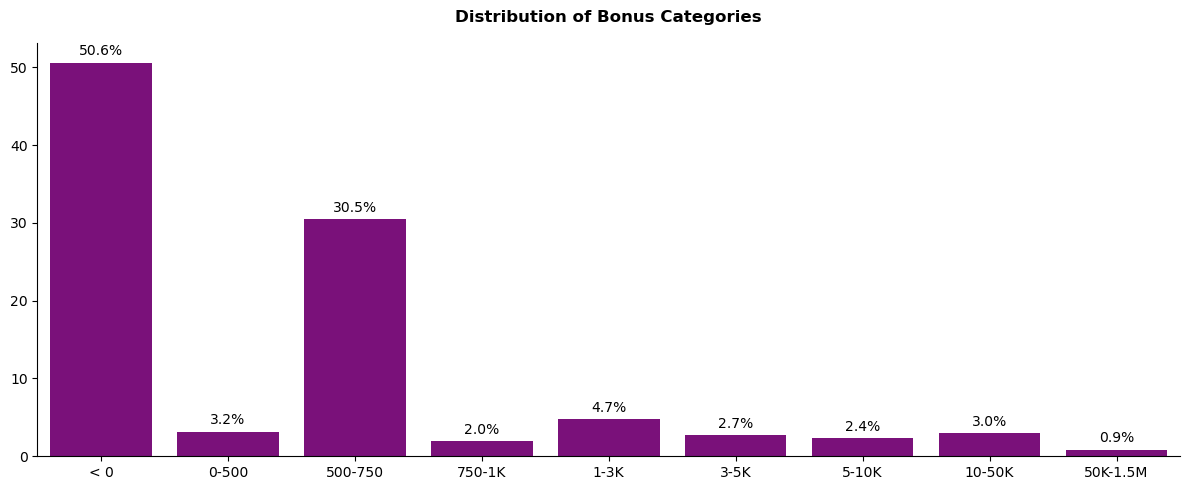

In [19]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
p1 = sns.countplot(x ='bonus_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in p1.containers:
    p1.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
p1.set(xlabel='', ylabel='')
p1.spines["top"].set_visible(False)
p1.spines["right"].set_visible(False)
p1.set_title('Distribution of Bonus Categories', pad = 15, fontweight ='bold')
plt.show()

### Other compensation

In [20]:
# Discretize variables into equal-sized buckets
bins = [-2600, 0, 1000, 5000, 10000, 25000, 100000, 500000, 7000000]
labels = ['< 0', '0-1K', '1-5K', '5-10K','10-25K','25-100K', '100-500K','500K-7M']
df1['other_c'] = pd.cut(df1['other'], bins, labels= labels)

# Create a contingency table
cross_other = pd.crosstab(df1.other_c, df1.gender, normalize='columns')*100

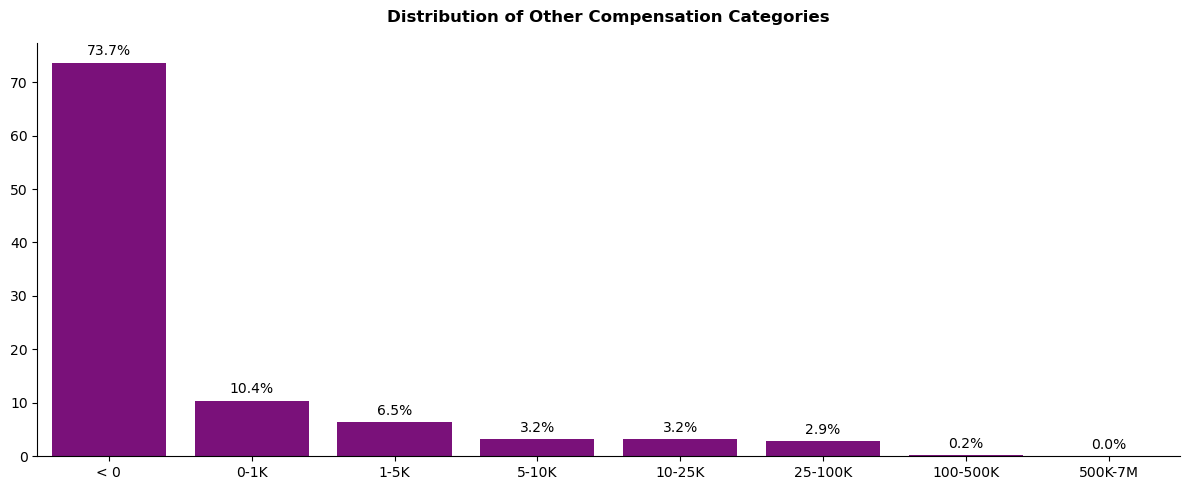

In [21]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
p1 = sns.countplot(x ='other_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in p1.containers:
    p1.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
p1.set(xlabel='', ylabel='')
p1.spines["top"].set_visible(False)
p1.spines["right"].set_visible(False)
p1.set_title('Distribution of Other Compensation Categories', pad = 15, fontweight ='bold')
plt.show()

### Overtime

In [22]:
# Discretize variables into equal-sized buckets
bins = [-15, 0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['< 0', '0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
df1['overtime_c'] = pd.cut(df1['overtime'], bins, labels= labels)

# Create a contingency table
cross_overtime = pd.crosstab(df1.overtime_c, df1.gender, normalize='columns')*100

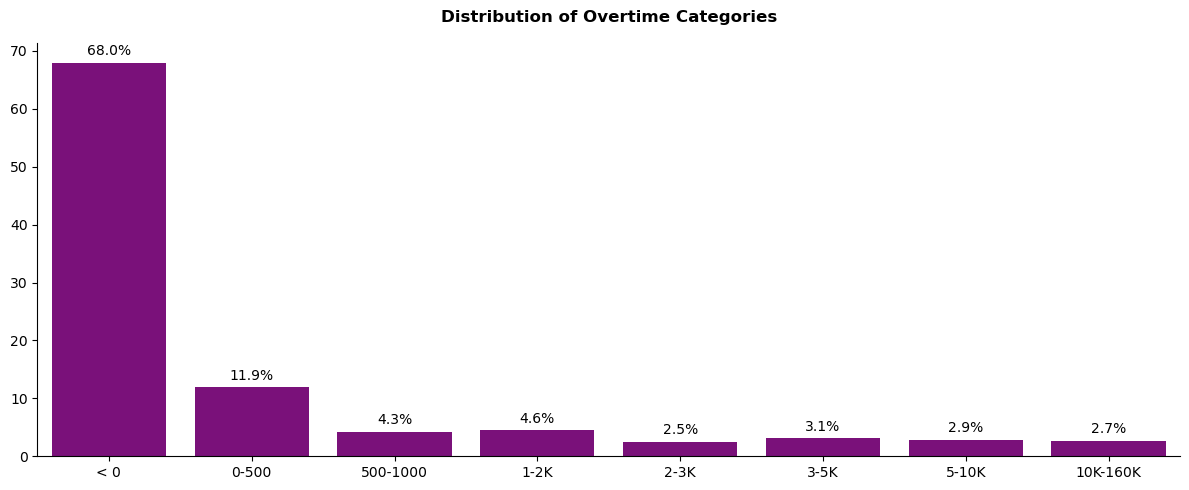

In [23]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
p1 = sns.countplot(x ='overtime_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in p1.containers:
    p1.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
p1.set(xlabel='', ylabel='')
p1.spines["top"].set_visible(False)
p1.spines["right"].set_visible(False)
p1.set_title('Distribution of Overtime Categories', pad = 15, fontweight ='bold')
plt.show()

## Visualize
Visual representation of different compensation components across gender categories

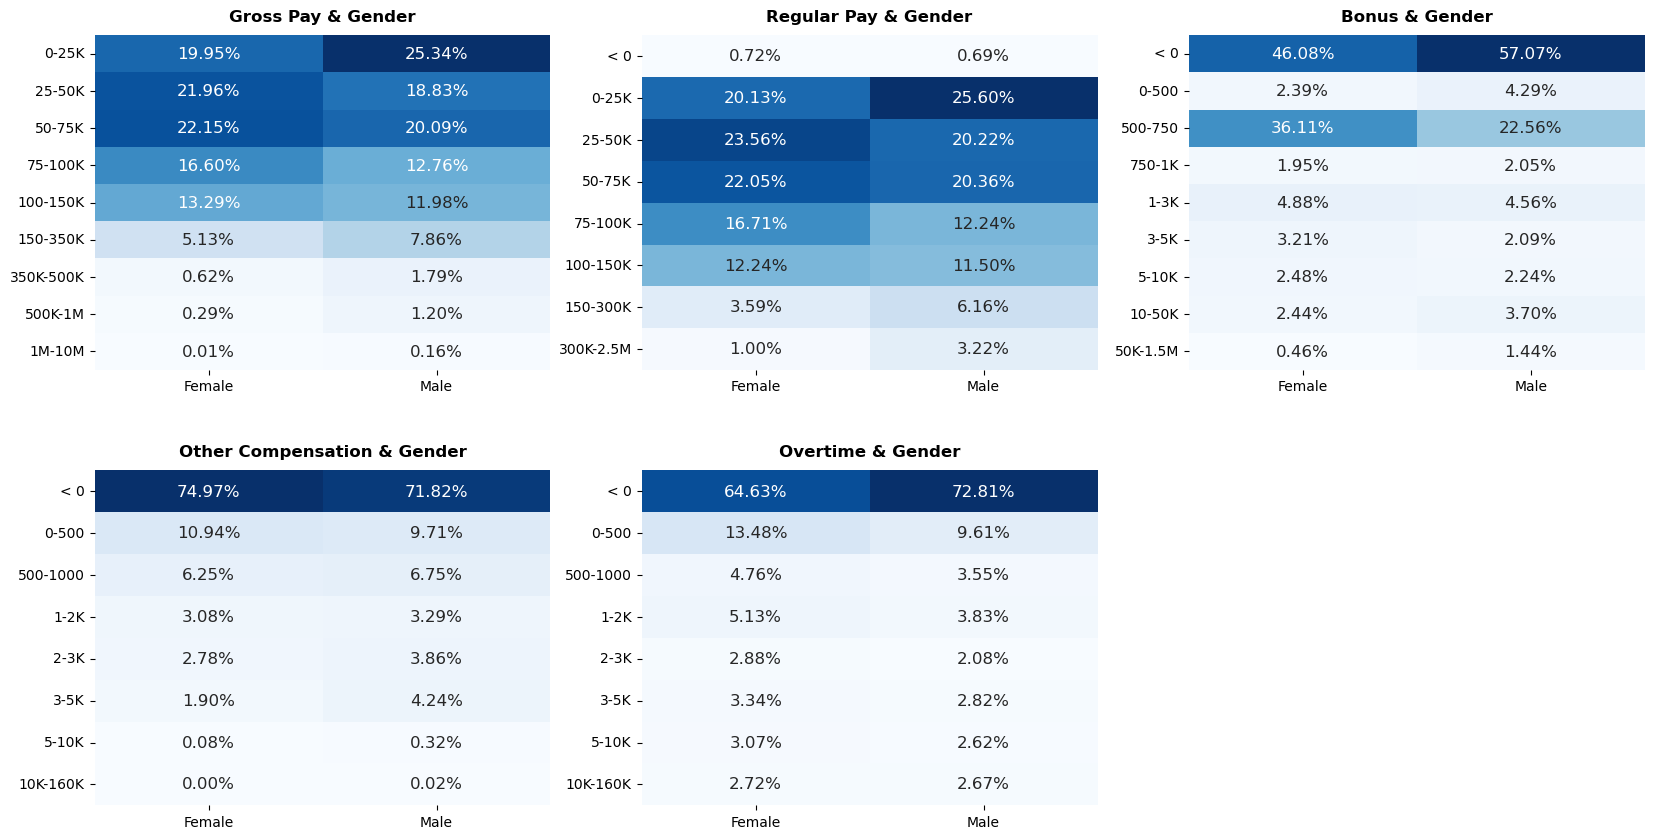

In [24]:
fig = plt.figure(figsize = (20,10))
plt.subplot(231)
sns.heatmap(data=cross_gross/100, cmap='Blues', annot=True, annot_kws={"fontsize":12}, fmt=".2%", cbar=False)
plt.title('Gross Pay & Gender', pad=10, fontweight ='bold')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(232)
sns.heatmap(data=cross_reg/100, cmap='Blues', annot=True, annot_kws={"fontsize":12}, fmt=".2%", cbar=False)
plt.title('Regular Pay & Gender', pad=10, fontweight ='bold')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(233)
sns.heatmap(data=cross_bonus/100, cmap='Blues', annot=True, annot_kws={"fontsize":12}, fmt=".2%", cbar=False)
plt.title('Bonus & Gender', pad=10, fontweight ='bold')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.subplot(234)
sns.heatmap(data=cross_other/100, cmap='Blues', annot=True, annot_kws={"fontsize":12}, fmt=".2%", cbar=False)
plt.title('Other Compensation & Gender', pad=10, fontweight ='bold')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.gca().set_yticklabels(labels, rotation=0)

plt.subplot(235)
sns.heatmap(data=cross_overtime/100, cmap='Blues', annot=True, annot_kws={"fontsize":12}, fmt=".2%", cbar=False)
plt.title('Overtime & Gender', pad=10, fontweight ='bold')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.gca().set_yticklabels(labels, rotation=0)

plt.subplots_adjust(hspace = 0.3)
plt.show()

## Observations
1. **Gross Pay & Gender**:
   The chart shows that while females are more prevalent in low-to-mid salary ranges, males increasingly dominate higher gross pay brackets, especially in the top earning categories, indicating a gender disparity in higher-paying roles.
***
2. **Regular Pay & Gender**:
    Females are better represented in the middle Regular Pay ranges, while males are more represented in both the lowest and highest pay categories, suggesting a gender gap in higher regular salaries.
***
3. **Bonus & Gender**:
   - High proportions of both genders have negative Bonus values (<0), with males slightly higher.
   - Females are more represented in the mid-bonus ranges, but males dominate in the highest bonus categories. This indicates that males are more likely to receive larger bonuses, contributing to overall compensation disparities.
***
4. **Other Compensation & Gender**:
   - Both genders have a significant proportion of negative values in this category.
   - There is a disparity in other compensation where males are more likely to receive higher amounts of other compensation, contributing to the overall gender pay gap.
***
5. **Overtime & Gender**:
   - Both genders have a significant proportion of negative values in this category.
   - Females are more likely to receive Overtime pay, indicating that they may be more frequently working overtime compared to their male counterparts.
***

## Conclusions
- `Mid-Level Representation`: Females tend to be more represented in mid-level salary ranges across various compensation types, indicating a significant presence in middle-income positions.
- `High-Level Disparity`: Males are more likely to dominate both the highest and lowest ranges of Gross Pay, Regular Pay, and Bonuses, highlighting a gender pay gap, especially in higher-income brackets.
- `Bonus and Other Compensation`: Males receive significantly more bonuses and other compensation in the higher ranges, contributing to the overall disparity in total compensation.
- `Overtime Differences`: Females dominate most overtime categories. The pattern indicates that females are slightly more likely to be in the mid to high overtime pay categories, which could imply a gender difference in the distribution of overtime work or the roles that typically require overtime.

These insights suggest a complex picture of gender pay differences, with females facing barriers to reaching the highest pay levels, while being more represented in mid-level pay ranges.

<a name="7-tests"></a>
# Tests

## Chi-Square Test
I want to test if there is a significant association between gender and Gross Pay, Gender and Regular Pay, Gender and Bonus, Gender and Overtime, Gender and Other compensation.

### Gross Pay

In [25]:
# Create a contingency table of counts of employees in each salary bracket by gender:
cross_gross_num = pd.crosstab(df1.gross_pay_c, df1.gender)

#run the test:
chi2_stat, p_value, dof, expected = chi2_contingency(cross_gross_num)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Define the significance level
significance_level = 0.05

if p_value < significance_level:
    print("There is a statistically significant association between Gender and Gross Pay.")
else:
    print("There is no statistically significant association between Gender and Gross Pay.")

Chi-Square Statistic: 718.052606472658
P-Value: 9.283658563704096e-150
There is a statistically significant association between Gender and Gross Pay.


### Regular Pay

In [26]:
# Create a contingency table of counts of employees in each salary bracket by gender:
cross_reg_num = pd.crosstab(df1.regular_pay_c, df1.gender)

#run the test:
chi2_stat, p_value, dof, expected = chi2_contingency(cross_reg_num)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Define the significance level
significance_level = 0.05

if p_value < significance_level:
    print("There is a statistically significant association between Gender and Regular Pay.")
else:
    print("There is no statistically significant association between Gender and Regular Pay.")

Chi-Square Statistic: 747.6311214869598
P-Value: 3.6892521932613066e-157
There is a statistically significant association between Gender and Regular Pay.


### Bonus

In [27]:
# Create a contingency table of counts of employees in each salary bracket by gender:
cross_bonus_num = pd.crosstab(df1.bonus_c, df1.gender)

#run the test:
chi2_stat, p_value, dof, expected = chi2_contingency(cross_bonus_num)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Define the significance level
significance_level = 0.05

if p_value < significance_level:
    print("There is a statistically significant association between Gender and Bonus.")
else:
    print("There is no statistically significant association between Gender and Bonus.")

Chi-Square Statistic: 1185.0205048197427
P-Value: 1.652738089423865e-250
There is a statistically significant association between Gender and Bonus.


### Other Compensation

In [28]:
# Create a contingency table of counts of employees in each salary bracket by gender:
cross_other_num = pd.crosstab(df1.other_c, df1.gender)

#run the test:
chi2_stat, p_value, dof, expected = chi2_contingency(cross_other_num)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Define the significance level
significance_level = 0.05

if p_value < significance_level:
    print("There is a statistically significant association between Gender and Other Compensation.")
else:
    print("There is no statistically significant association between Gender and Other Compensation.")

Chi-Square Statistic: 298.78524790332756
P-Value: 1.0993449722096833e-60
There is a statistically significant association between Gender and Other Compensation.


### Overtime

In [29]:
# Create a contingency table of counts of employees in each salary bracket by gender:
cross_over_num = pd.crosstab(df1.overtime_c, df1.gender)

#run the test:
chi2_stat, p_value, dof, expected = chi2_contingency(cross_over_num)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Define the significance level
significance_level = 0.05

if p_value < significance_level:
    print("There is a statistically significant association between Gender and Overtime.")
else:
    print("There is no statistically significant association between Gender and Overtime.")

Chi-Square Statistic: 340.55275553064234
P-Value: 1.2959970561586157e-69
There is a statistically significant association between Gender and Overtime.


### Conclusion 
We can consider pay differences between genders in all categories statistically significant.

## Mann-Whitney Test

In [30]:
# Split the data by gender
female_data = df1[df1['gender'] == 'Female']
male_data = df1[df1['gender'] == 'Male']

# Gross Pay
u_stat_gross, p_value_gross = mannwhitneyu(female_data['gross_pay'], male_data['gross_pay'])

# Regular Pay
u_stat_regular, p_value_regular = mannwhitneyu(female_data['regular_pay'], male_data['regular_pay'])

# Bonus
u_stat_bonus, p_value_bonus = mannwhitneyu(female_data['bonus'], male_data['bonus'])

# Other Compensation
u_stat_other, p_value_other = mannwhitneyu(female_data['other'], male_data['other'])

# Overtime
u_stat_overtime, p_value_overtime = mannwhitneyu(female_data['overtime'], male_data['overtime'])

# Print the results
print(f"Gross Pay - U Statistic: {u_stat_gross}, P-Value: {p_value_gross}")
print(f"Regular Pay - U Statistic: {u_stat_regular}, P-Value: {p_value_regular}")
print(f"Bonus - U Statistic: {u_stat_bonus}, P-Value: {p_value_bonus}")
print(f"Other Compensation - U Statistic: {u_stat_other}, P-Value: {p_value_other}")
print(f"Overtime - U Statistic: {u_stat_overtime}, P-Value: {p_value_overtime}")

Gross Pay - U Statistic: 216779604.5, P-Value: 0.000424088923738845
Regular Pay - U Statistic: 218209491.0, P-Value: 2.6192823083611484e-06
Bonus - U Statistic: 232699288.5, P-Value: 6.181942985444357e-73
Other Compensation - U Statistic: 203482094.0, P-Value: 1.394105755158084e-21
Overtime - U Statistic: 228892808.5, P-Value: 1.6995962729492774e-59


In [31]:
# Define the significance level
significance_level = 0.05

# Interpret the results
def interpret_results(p_value, compensation_type):
    if p_value < significance_level:
        print(f"There is a statistically significant difference in {compensation_type} between genders.")
    else:
        print(f"There is no statistically significant difference in {compensation_type} between genders.")

interpret_results(p_value_gross, 'gross pay')
interpret_results(p_value_regular, 'regular pay')
interpret_results(p_value_bonus, 'bonuses')
interpret_results(p_value_other, 'other compensation')
interpret_results(p_value_overtime, 'overtime pay')

There is a statistically significant difference in gross pay between genders.
There is a statistically significant difference in regular pay between genders.
There is a statistically significant difference in bonuses between genders.
There is a statistically significant difference in other compensation between genders.
There is a statistically significant difference in overtime pay between genders.


<a name="8-gender-pay-gap-analysis-by-position-group"></a>
# Gender Pay Gap Analysis by Position Group
There are three position groups in the dataset: `University`, `Health System` and `Athletics`. As the description says *"Dataset differentiates positions associated with the Wexner Medical Center/Health System, Athletics, and the rest of the university. The Ohio State Athletics Department operates a self-sustaining budget, receiving no University general funds, student fees or state tax support. The Wexner Medical Center/Health System operates a self-sustaining budget, receiving no University general funds, student fees or state tax support.*

I want to compare gender differences in Gross Pay and Overtime in these positions groups.

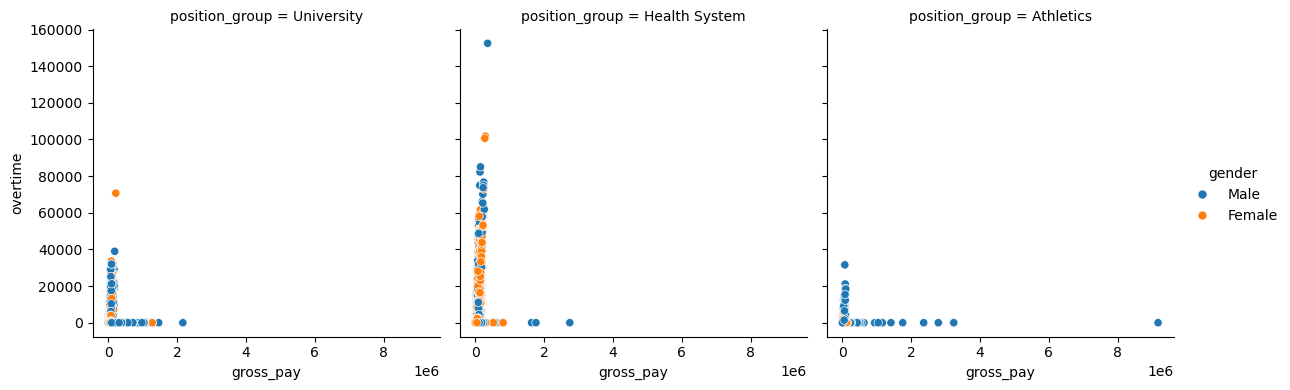

In [32]:
sns.relplot(
    data=df, kind="scatter",
    x="gross_pay", y="overtime", hue="gender",
    col="position_group", height=4,
    )
plt.show()

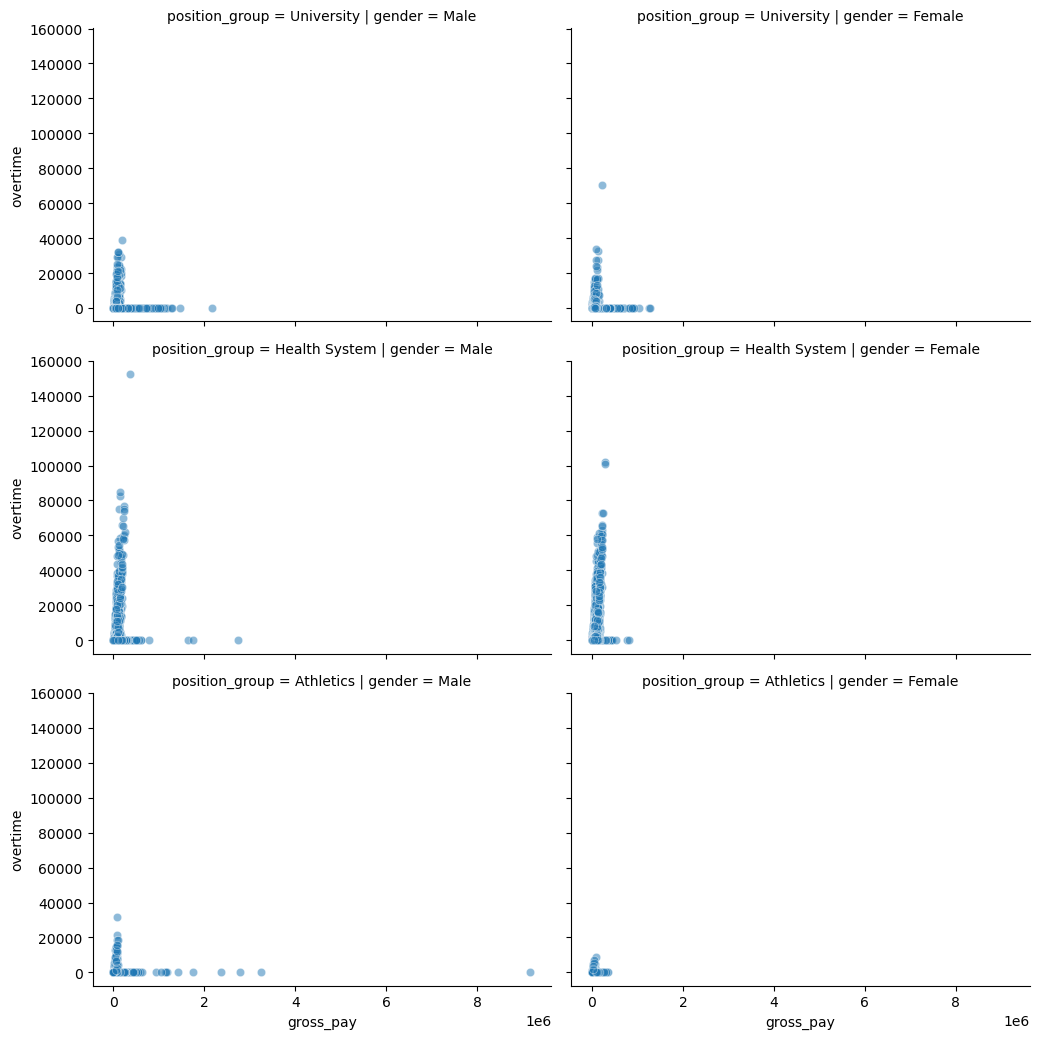

In [33]:
# Adjust further to add subplots based on family support
sns.relplot(x="gross_pay", y="overtime", data=df, kind="scatter", col="gender", row = "position_group", 
            height=3.5, aspect=1.5, alpha = 0.5)
plt.show()

## Create a dataset

In [34]:
df2 = df.copy()

## First look
First, let's see how many people there are in each Position Group

In [35]:
# see how the position groups compare by numbers
df2.position_group.value_counts()

position_group
University       22102
Health System    17640
Athletics         2145
Name: count, dtype: int64

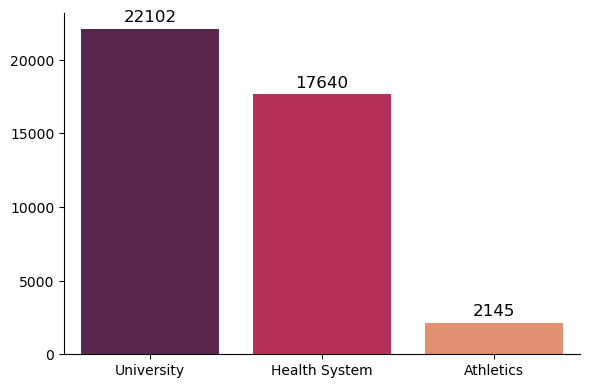

In [36]:
fig = plt.figure(figsize = (6, 4), tight_layout = True)
ax = sns.countplot(x ='position_group', hue = "position_group", data = df2, palette = "rocket")
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=3)
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

Most people work for University, least number of people, more than ten times fewer, work for Athletics position group.

**Let's see how many males and females are in each position group:**

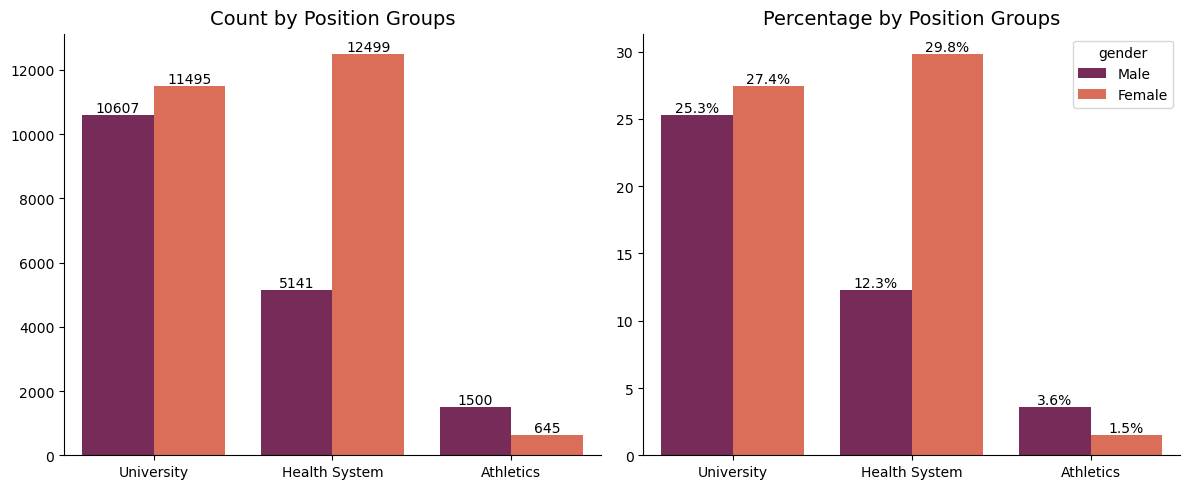

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=False, sharex=True, tight_layout = True)
sns.despine(fig)

p1= sns.countplot(x ='position_group', hue = "gender", data = df, palette = "rocket", ax=ax[0])
for container in p1.containers:
    ax[0].bar_label(container, fontsize=10)

p2 = sns.countplot(x ='position_group', hue = "gender", data = df, palette = "rocket", stat = 'percent', ax=ax[1] )
for container in p2.containers:
    ax[1].bar_label(container, fontsize=10, fmt= '{:.1f}%')

p1.set(xlabel='', ylabel='')
p2.set(xlabel='', ylabel='')
ax[0].set_title('Count by Position Groups', pad = 7, fontsize=14)
ax[1].set_title('Percentage by Position Groups', pad = 7, fontsize=14)
ax[0].get_legend().set_visible(False)

plt.show()

**Observations**:
- As we can see, `University` shows near parity between genders, suggesting a more balanced distribution in academic or administrative roles.
- The `Health System` is a female-dominated sector, indicating a possible gender trend in professions related to health within this dataset.
- `Athletics` remains male-dominated, which aligns with traditional gender roles in sports-related fields.


## Gross Pay 
Let's see how the Gross Pay numbers compare in different position groups

### Distribution of Gross Pay categories

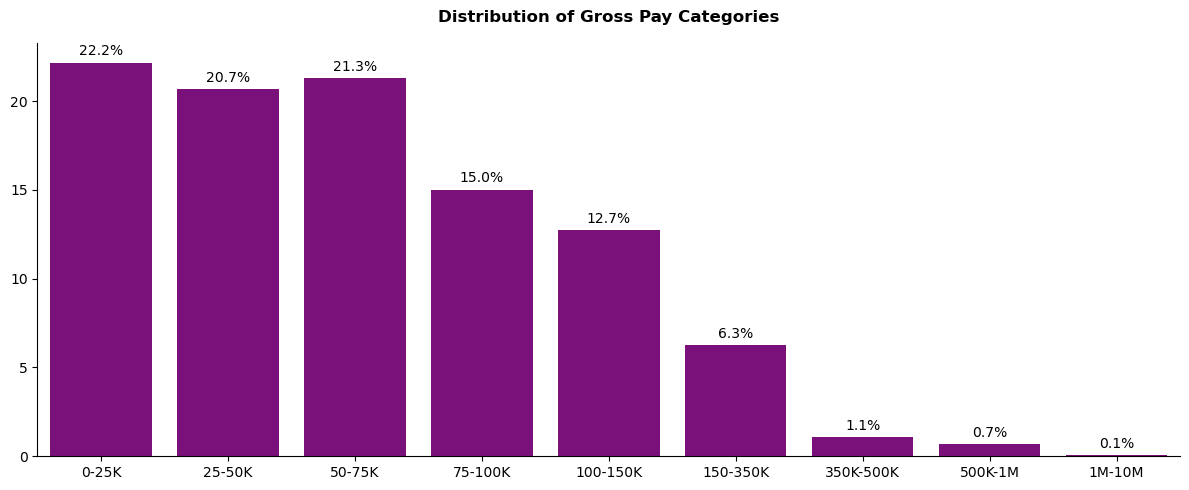

In [38]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.countplot(x ='gross_pay_c', data = df1, stat = 'percent', color = 'darkmagenta')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Distribution of Gross Pay Categories', pad = 15, fontweight ='bold')
plt.show()

In [39]:
# Discretize variables into buckets
bins = [0, 25000, 50000, 75000, 100000, 150000, 350000, 500000, 1000000, 10000000]
labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-350K', '350K-500K', '500K-1M', '1M-10M']
df2['gross_pay_c'] = pd.cut(df2['gross_pay'], bins, labels= labels)

# Create a contingency table
cross_gross_big = pd.crosstab(df2.gender, df2.gross_pay_c, normalize='index')*100
cross_gross_big

gross_pay_c,0-25K,25-50K,50-75K,75-100K,100-150K,150-350K,350K-500K,500K-1M,1M-10M
gender,,,,,,,,,
Female,19.952108,21.957060,22.151873,16.5997,13.287877,5.134137,0.616908,0.288161,0.012176
Male,25.342069,18.825371,20.089286,12.7609,11.978200,7.861781,1.785714,1.200139,0.156540


In [40]:
# Create a position_group/gender contingency table
cross_gross_pos_groups = pd.crosstab(index=[df2['position_group'], df2['gender']], columns=df2['gross_pay_c'], normalize = 'index')*100
cross_gross_pos_groups

gross_pay_c                0-25K     25-50K     50-75K    75-100K   100-150K  \
position_group gender                                                          
Athletics      Female  74.728682   6.821705   8.992248   3.720930   2.945736   
               Male    74.800000   4.733333   7.600000   5.133333   3.666667   
Health System  Female  18.025442  20.441635  20.049604  21.881751  16.409313   
               Male    18.537250  22.602606  21.182649  18.420541  14.180121   
University     Female  18.973467  24.454110  25.176164  11.578947  10.474119   
               Male    21.646083  18.987461  21.325540  11.096446  12.086358   

gross_pay_c             150-350K  350K-500K   500K-1M    1M-10M  
position_group gender                                            
Athletics      Female   2.790698   0.000000  0.000000  0.000000  
               Male     2.400000   0.466667  0.533333  0.666667  
Health System  Female   3.104248   0.064005  0.024002  0.000000  
               Male     4.648901   0.194515  0.175063  0.058354  
University     Female   7.472814   1.252719  0.591562  0.026098  
               Male    10.191383   2.743471  1.791270  0.131988

### Viz 1

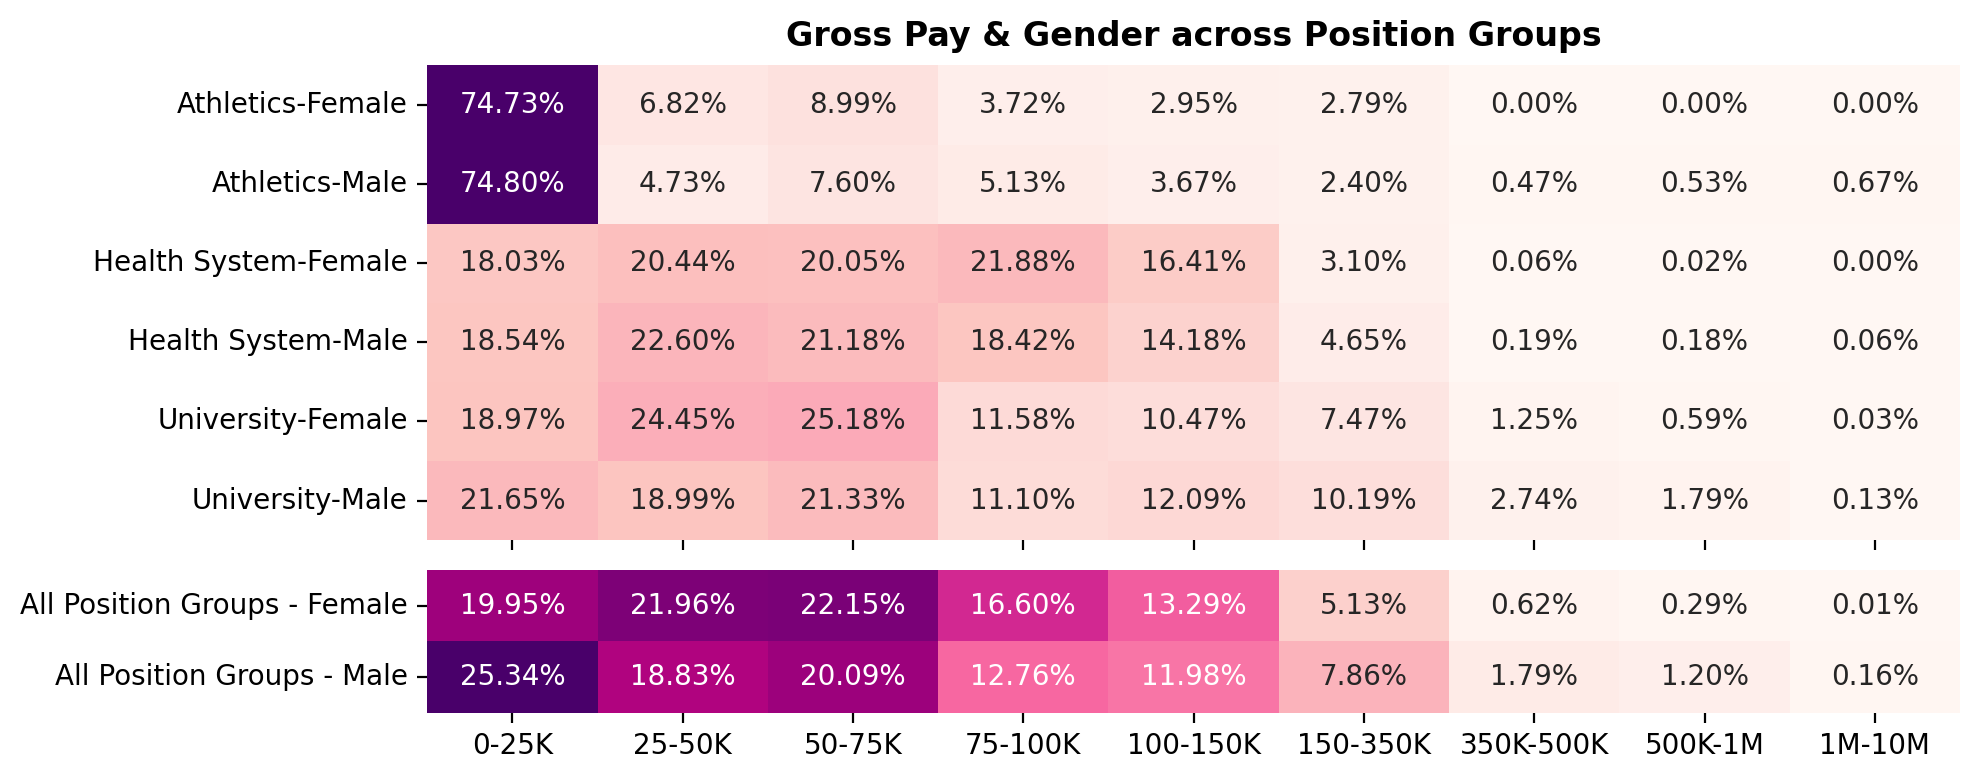

In [41]:
fig, ax = plt.subplots(2,1,figsize=(10,4), gridspec_kw = {'height_ratios':[10, 3]}, sharey=False, sharex=True, dpi = 200)
h1 = sns.heatmap(data=cross_gross_pos_groups/100, cmap='RdPu', annot=True, annot_kws={"fontsize":10},fmt=".2%", cbar=False, ax=ax[0])
h2 = sns.heatmap(data=cross_gross_big/100, cmap='RdPu', annot=True, annot_kws={"fontsize":10}, fmt=".2%", cbar=False, ax=ax[1])
h1.set(xlabel='', ylabel='')
h2.set(xlabel='', ylabel='')
ax[0].set_title('Gross Pay & Gender across Position Groups', pad = 7, fontweight ='bold')
ax[1].set_yticklabels(['All Position Groups - Female', 'All Position Groups - Male'], rotation=0)
ax[1].set_yticklabels(ax[1].yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### Viz 2

In [42]:
df_h = df.loc[(df2['position_group'] == "Health System")]
df_a = df.loc[(df2['position_group'] == "Athletics")]
df_u = df.loc[(df2['position_group'] == "University")]

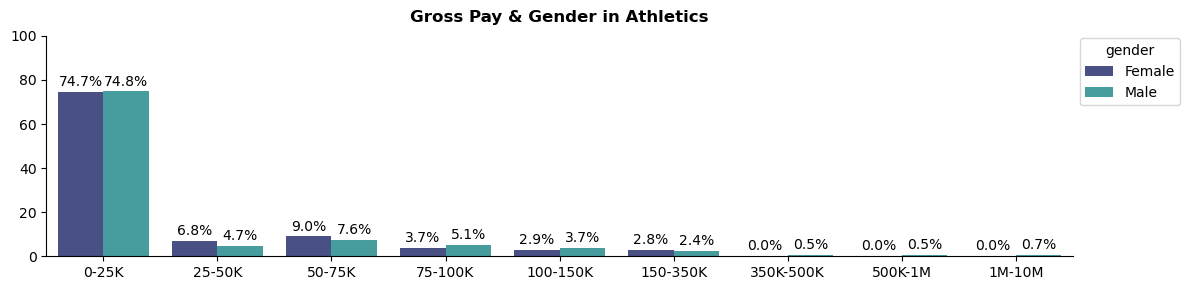

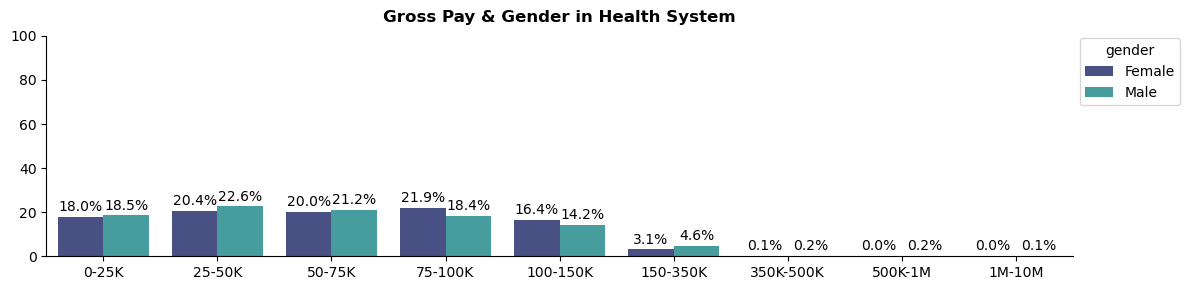

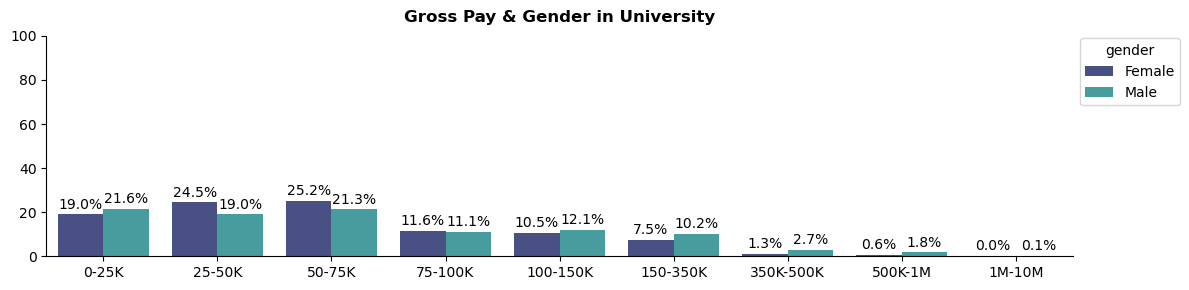

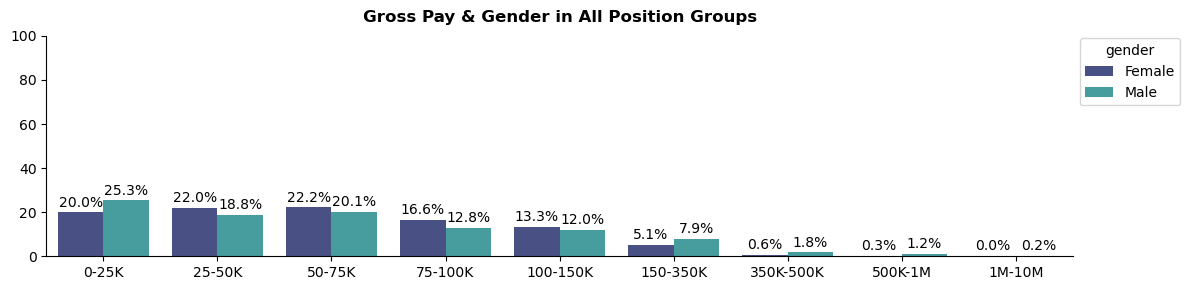

In [43]:
data = {
    'Athletics': df_a,
    'Health System': df_h,
    'University': df_u, 
    'All Position Groups': df2
}
bins = [0, 25000, 50000, 75000, 100000, 150000, 350000, 500000, 1000000, 10000000]
labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-350K', '350K-500K', '500K-1M', '1M-10M']
for dataset_name, i in data.items():
    i['gross_pay_c'] = pd.cut(df2['gross_pay'], bins, labels= labels)
    cross_gross_big = pd.crosstab(i.gender, i.gross_pay_c, normalize='index')*100
    fig = plt.figure(figsize = (12,3), tight_layout = True)
    stacked = cross_gross_big.stack().reset_index().rename(columns={0:'value'})
    
    ax = sns.barplot(x=stacked.gross_pay_c, y=stacked.value, hue=stacked.gender, palette = "mako")
    sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')
    for c in ax.containers:
        ax.bar_label(c, fontsize=10, padding=2, fmt= '{:.1f}%')
    ax.set(xlabel='', ylabel='')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(f'Gross Pay & Gender in {dataset_name}', pad = 10, fontweight ='bold')
    ax.set_ylim(0, 100)
plt.show()

### Observations
- **Athletics Group**: Both genders have a significant concentration in the lowest salary bracket, but males have a slight edge in higher salary ranges.
- **Health System**: Females are underrepresented in higher salary brackets compared to males, even though both genders have significant representation in the middle salary ranges.
- **University**: Similar to the Health System, females are underrepresented in higher salary brackets, with males showing a higher percentage in the high salary ranges.
- **Overall Trend**: Males generally have a higher representation in the higher salary ranges, indicating a possible gender pay gap, particularly in the upper echelons of compensation across all groups.

## Overtime

### Distribution of Overtime categories

In [44]:
# overtime across all position groups
bins = [-15, 0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['< 0', '0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
df2['overtime_c'] = pd.cut(df2['overtime'], bins, labels= labels)

# Create a contingency table
cross_over_big = pd.crosstab(df2.gender, df2.overtime_c, normalize='index')*100
cross_over_big

overtime_c,< 0,0-500,500-1000,1-2K,2-3K,3-5K,5-10K,10K-160K
gender,,,,,,,,
Female,64.629246,13.482690,4.756687,5.126020,2.877552,3.344292,3.068306,2.715208
Male,72.808442,9.612709,3.554035,3.832328,2.075603,2.823516,2.620594,2.672774


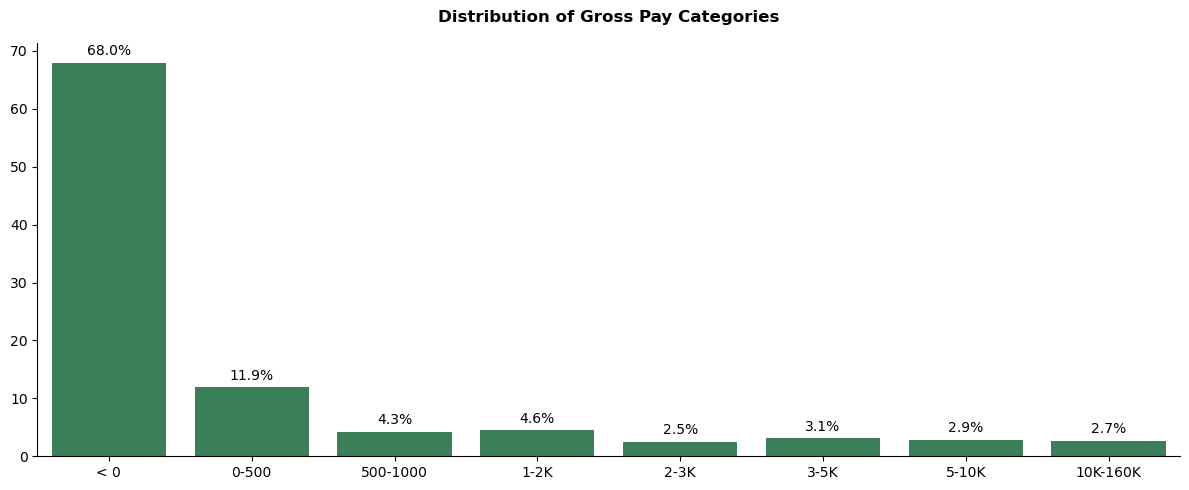

In [45]:
fig = plt.figure(figsize = (12,5), tight_layout = True)
ax = sns.countplot(x ='overtime_c', data = df1, stat = 'percent', color = 'seagreen')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3, fmt= '{:.1f}%')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Distribution of Gross Pay Categories', pad = 15, fontweight ='bold')
plt.show()

In [46]:
pd.crosstab(index=[df2['position_group'], df2['gender']], columns=df2['overtime_c'], margins = True)

overtime_c               < 0  0-500  500-1000  1-2K  2-3K  3-5K  5-10K  \
position_group gender                                                    
Athletics      Female    550     38        10    20    13    10      4   
               Male     1302     90        12    21    17    18     21   
Health System  Female   5435   2482       931  1045   595   715    662   
               Male     2141    931       396   450   228   320    314   
University     Female   9939    802       231   198   101    99     90   
               Male     9115    637       205   190   113   149    117   
All                    28482   4980      1785  1924  1067  1311   1208   

overtime_c             10K-160K    All  
position_group gender                   
Athletics      Female         0    645  
               Male          19   1500  
Health System  Female       634  12499  
               Male         361   5141  
University     Female        35  11495  
               Male          81  10607  
All                        1130  41887

In [47]:
cross_over_pos_groups = pd.crosstab(index=[df2['position_group'], df2['gender']], columns=df2['overtime_c'], normalize = 'index')*100
cross_over_pos_groups

overtime_c                   < 0      0-500  500-1000      1-2K      2-3K  \
position_group gender                                                       
Athletics      Female  85.271318   5.891473  1.550388  3.100775  2.015504   
               Male    86.800000   6.000000  0.800000  1.400000  1.133333   
Health System  Female  43.483479  19.857589  7.448596  8.360669  4.760381   
               Male    41.645594  18.109317  7.702782  8.753161  4.434935   
University     Female  86.463680   6.976946  2.009569  1.722488  0.878643   
               Male    85.933817   6.005468  1.932686  1.791270  1.065334   

overtime_c                 3-5K     5-10K  10K-160K  
position_group gender                                
Athletics      Female  1.550388  0.620155  0.000000  
               Male    1.200000  1.400000  1.266667  
Health System  Female  5.720458  5.296424  5.072406  
               Male    6.224470  6.107761  7.021980  
University     Female  0.861244  0.782949  0.304480  
               Male    1.404733  1.103045  0.763647

### Viz 1

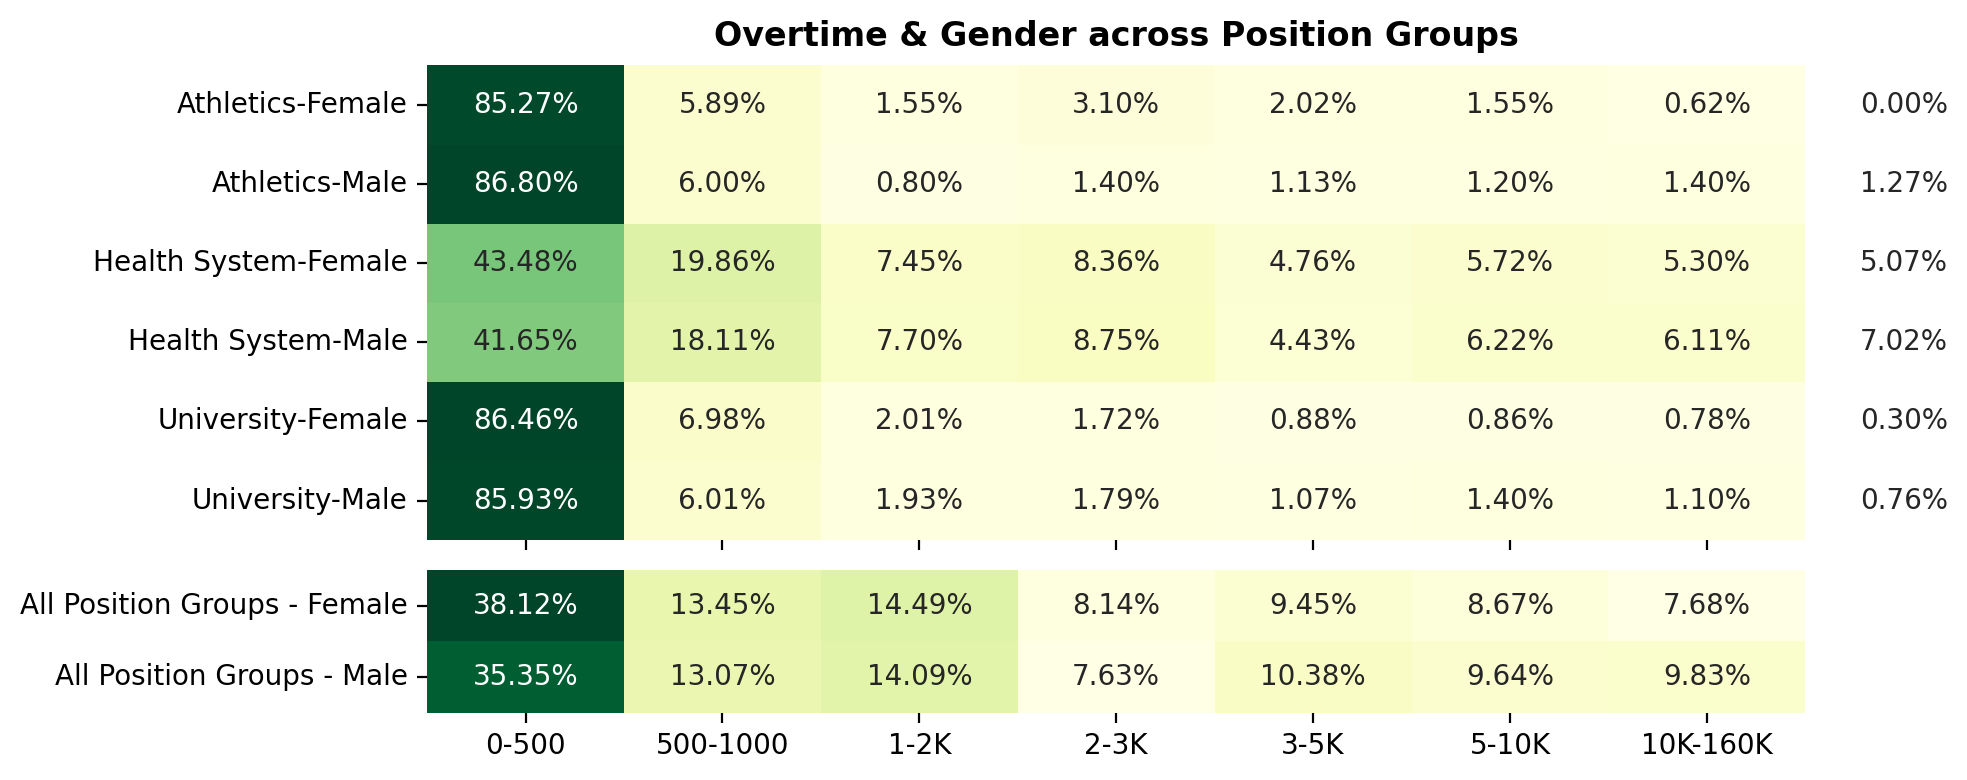

In [92]:
fig, ax = plt.subplots(2,1,figsize=(10,4), gridspec_kw = {'height_ratios':[10, 3]}, sharey=False, sharex=True, dpi = 200)
h1 = sns.heatmap(data=cross_over_pos_groups/100, cmap='YlGn', annot=True, annot_kws={"fontsize":10},fmt=".2%", cbar=False, ax=ax[0])
h2 = sns.heatmap(data=cross_over_big/100, cmap='YlGn', annot=True, annot_kws={"fontsize":10}, fmt=".2%", cbar=False, ax=ax[1])
h1.set(xlabel='', ylabel='')
h2.set(xlabel='', ylabel='')
ax[0].set_title('Overtime & Gender across Position Groups', pad = 7, fontweight ='bold')
ax[1].set_yticklabels(['All Position Groups - Female', 'All Position Groups - Male'], rotation=0)
ax[1].set_yticklabels(ax[1].yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### Viz 2

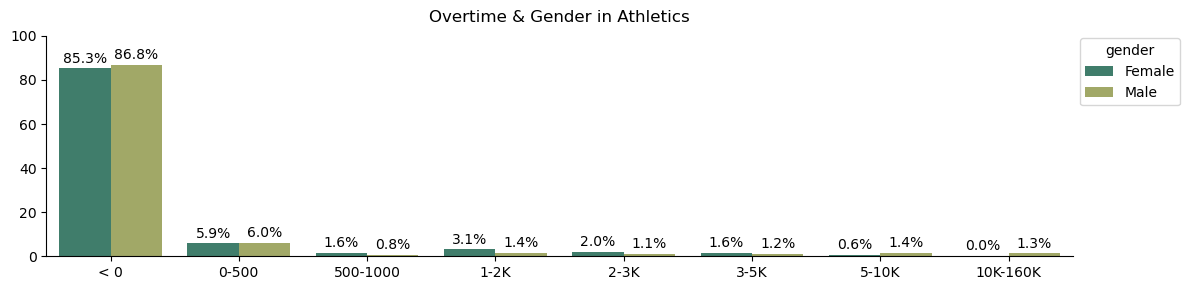

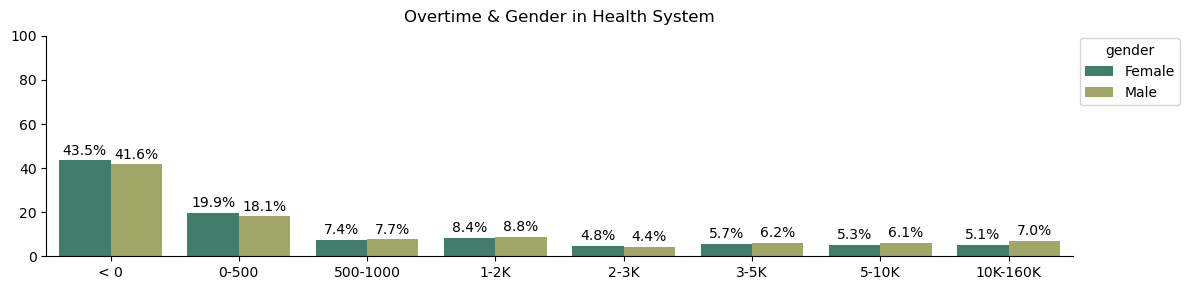

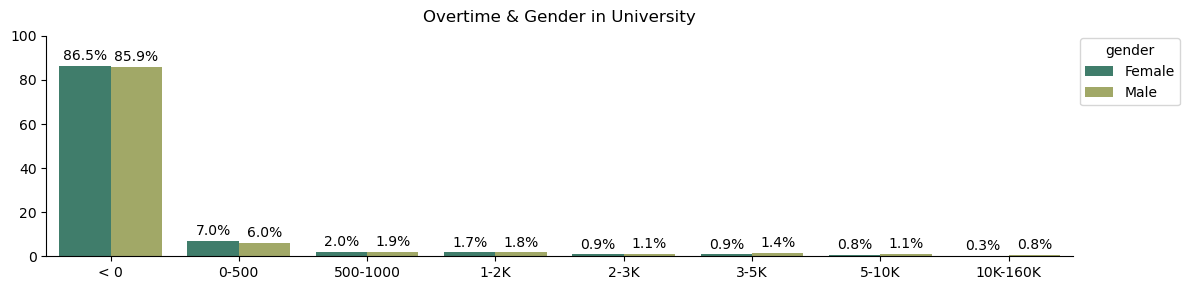

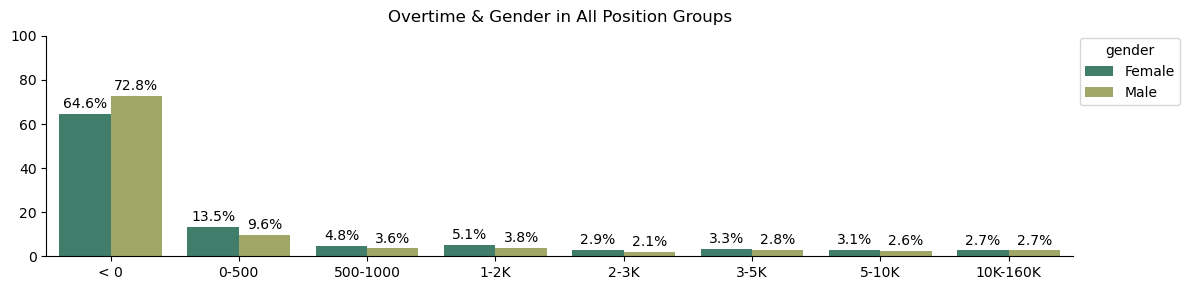

In [49]:
data = {
    'Athletics': df_a,
    'Health System': df_h,
    'University': df_u,
    'All Position Groups': df2
}
bins = [-15, 0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['< 0', '0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
for dataset_name, i in data.items():
    i['overtime_c'] = pd.cut(df2['overtime'], bins, labels= labels)
    cross_over_big = pd.crosstab(i.gender, i.overtime_c, normalize='index')*100
    fig = plt.figure(figsize = (12, 3), tight_layout = True)
    stacked = cross_over_big.stack().reset_index().rename(columns={0:'value'})
    
    ax = sns.barplot(x=stacked.overtime_c, y=stacked.value, hue=stacked.gender, palette = "gist_earth")
    sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')
    for c in ax.containers:
        ax.bar_label(c, fontsize=10, padding=2, fmt= '{:.1f}%')
    ax.set(xlabel='', ylabel='')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(f'Overtime & Gender in {dataset_name}', pad = 10)
    ax.set_ylim(0, 100)
plt.show()

### Remove values below zero

In [64]:
# overtime across all position groups
bins = [0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
df2['overtime_c_above_zero'] = pd.cut(df2['overtime'], bins, labels= labels)

# Create a contingency table
cross_over_above_zero = pd.crosstab(df2.gender, df2.overtime_c, normalize='index')*100
cross_over_above_zero

overtime_c,0-500,500-1000,1-2K,2-3K,3-5K,5-10K,10K-160K
gender,,,,,,,
Female,38.118187,13.448078,14.492255,8.135399,9.454963,8.674699,7.676420
Male,35.351812,13.070362,14.093817,7.633262,10.383795,9.637527,9.829424


In [65]:
cross_over_above_zero = pd.crosstab(index=[df2['position_group'], df2['gender']], columns=df2['overtime_c'], 
                                               normalize = 'index')*100
cross_over_above_zero

overtime_c                 0-500   500-1000       1-2K       2-3K       3-5K  \
position_group gender                                                          
Athletics      Female  40.000000  10.526316  21.052632  13.684211  10.526316   
               Male    45.454545   6.060606  10.606061   8.585859   9.090909   
Health System  Female  35.135900  13.179502  14.793318   8.422990  10.121744   
               Male    31.033333  13.200000  15.000000   7.600000  10.666667   
University     Female  51.542416  14.845758  12.724936   6.491003   6.362468   
               Male    42.694370  13.739946  12.734584   7.573727   9.986595   

overtime_c                 5-10K   10K-160K  
position_group gender                        
Athletics      Female   4.210526   0.000000  
               Male    10.606061   9.595960  
Health System  Female   9.371461   8.975085  
               Male    10.466667  12.033333  
University     Female   5.784062   2.249357  
               Male     7.841823   5.428954

In [66]:
# overtime across all position groups
bins = [0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
df2['overtime_c'] = pd.cut(df2['overtime'], bins, labels= labels)

# Create a contingency table
cross_over_big = pd.crosstab(df2.gender, df2.overtime_c, normalize='index')*100
cross_over_big

overtime_c,0-500,500-1000,1-2K,2-3K,3-5K,5-10K,10K-160K
gender,,,,,,,
Female,38.118187,13.448078,14.492255,8.135399,9.454963,8.674699,7.676420
Male,35.351812,13.070362,14.093817,7.633262,10.383795,9.637527,9.829424


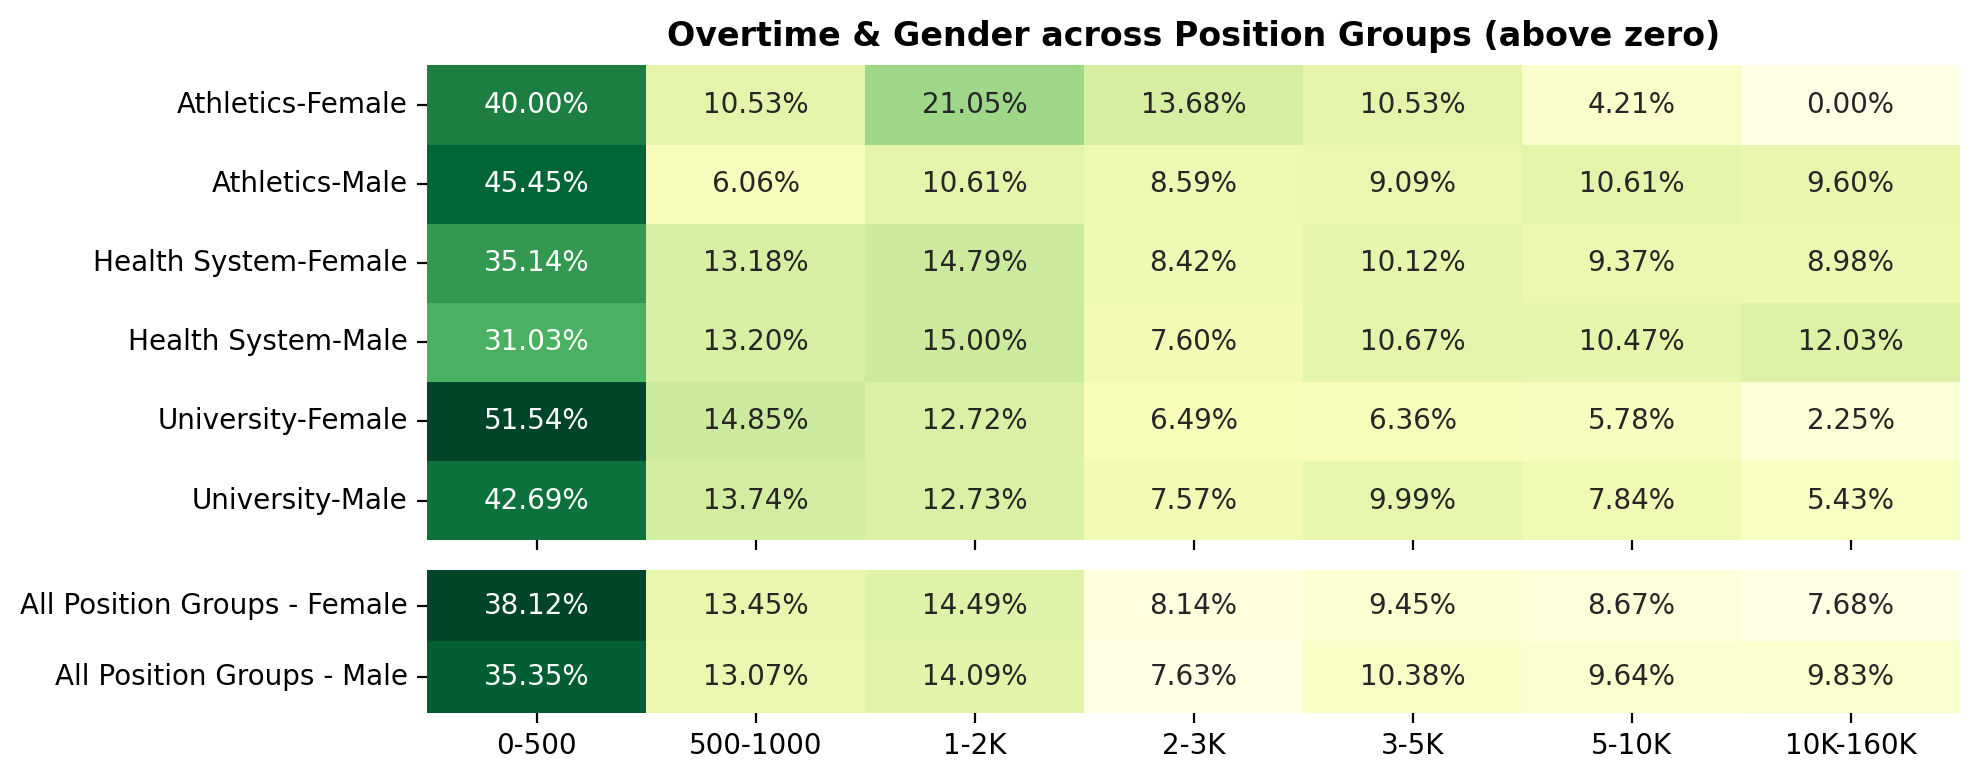

In [93]:
fig, ax = plt.subplots(2,1,figsize=(10,4), gridspec_kw = {'height_ratios':[10, 3]}, sharey=False, sharex=True, dpi = 200)
h1 = sns.heatmap(data=cross_over_above_zero/100, cmap='YlGn', annot=True, annot_kws={"fontsize":10},fmt=".2%", 
                 cbar=False, ax=ax[0])
h2 = sns.heatmap(data=cross_over_big/100, cmap='YlGn', annot=True, annot_kws={"fontsize":10}, fmt=".2%", 
                 cbar=False, ax=ax[1])
h1.set(xlabel='', ylabel='')
h2.set(xlabel='', ylabel='')
ax[0].set_title('Overtime & Gender across Position Groups (above zero)', pad = 7, fontweight ='bold')
ax[1].set_yticklabels(['All Position Groups - Female', 'All Position Groups - Male'], rotation=0)
ax[1].set_yticklabels(ax[1].yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()
plt.show()

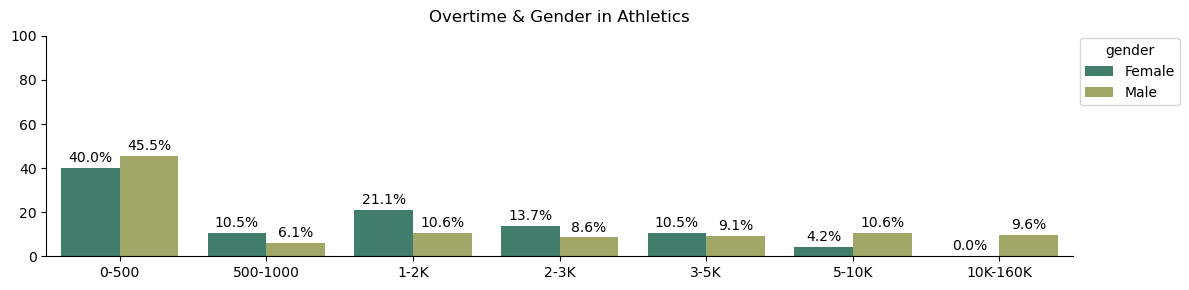

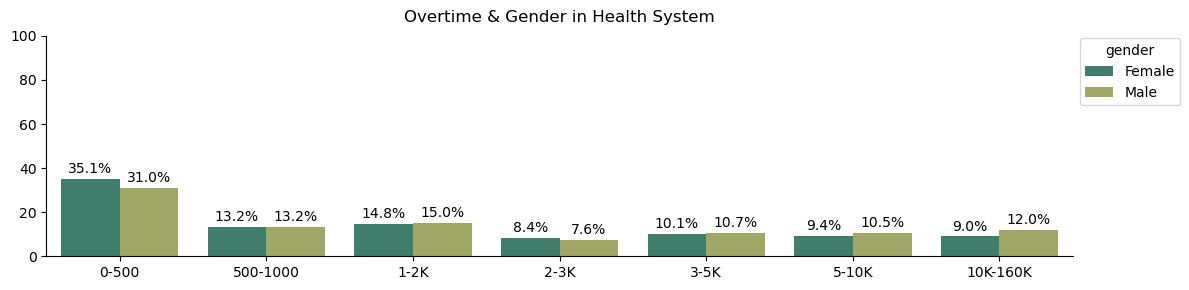

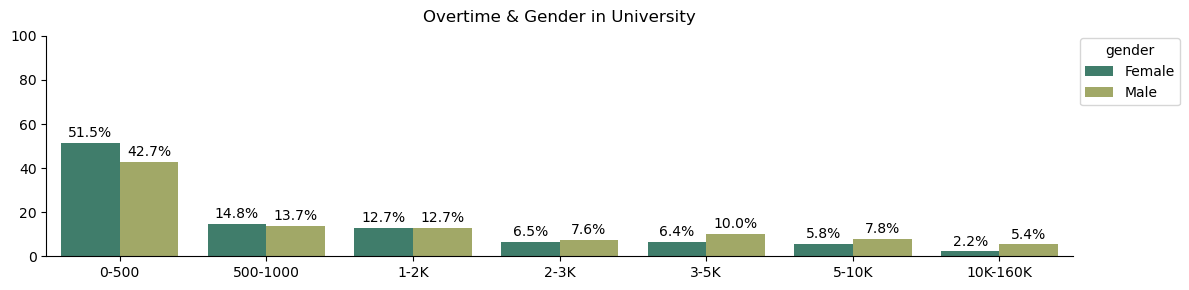

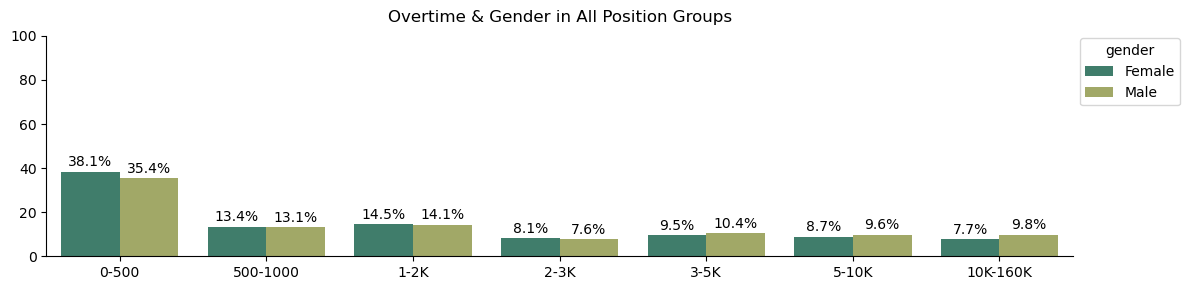

In [68]:
data = {
    'Athletics': df_a,
    'Health System': df_h,
    'University': df_u,
    'All Position Groups': df2
}
bins = [0, 500, 1000, 2000, 3000, 5000, 10000, 160000]
labels = ['0-500', '500-1000', '1-2K','2-3K','3-5K', '5-10K', '10K-160K']
for dataset_name, i in data.items():
    i['overtime_c'] = pd.cut(df2['overtime'], bins, labels= labels)
    cross_over_big = pd.crosstab(i.gender, i.overtime_c, normalize='index')*100
    fig = plt.figure(figsize = (12, 3), tight_layout = True)
    stacked = cross_over_big.stack().reset_index().rename(columns={0:'value'})
    
    ax = sns.barplot(x=stacked.overtime_c, y=stacked.value, hue=stacked.gender, palette = "gist_earth")
    sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')
    for c in ax.containers:
        ax.bar_label(c, fontsize=10, padding=2, fmt= '{:.1f}%')
    ax.set(xlabel='', ylabel='')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(f'Overtime & Gender in {dataset_name}', pad = 10)
    ax.set_ylim(0, 100)
plt.show()

### Observations
`Health System Group:`The Health System group stands out as having a more even distribution of overtime earnings across brackets for both genders, though males still dominate the higher earning brackets. This group shows the most significant gender differences in overtime pay, especially in the mid to high earning brackets.

`Athletics and University Groups:` These groups show a more uniform distribution of overtime earnings, with a large majority of both male and female employees earning less than $500 in overtime. There are only small variations between genders in the higher earning brackets.

**Gender Disparity in Higher Overtime Brackets:** Across all position groups, males tend to be overrepresented in the higher overtime earning brackets. 
**Similar Distribution in Lower Overtime Brackets:** Both male and female employees predominantly fall into the lowest overtime earnings bracket (< $500), particularly in the Athletics and University position groups. This suggests that overtime earnings are generally low for the majority of employees, regardless of gender, in these groups.

The data suggests that there may be systemic factors contributing to gender disparities in Overtime Pay. Further analysis is necessary to understand the underlying reasons for these differences, such as role types, availability of overtime, and potential biases in overtime assignment.

<a name="9-general-conclusion"></a>
# General Conclusion
The analysis reveals significant gender disparities in compensation at OSU, particularly in higher pay brackets. Females are less represented in higher compensation categories across all components, indicating potential gender inequalities. Structural differences in overtime allocation and the presence of numerous negative values in the dataset warrant further investigation to understand the underlying causes.

<a name="10-recommendations"></a>
# Recommendations
- Further Analysis: Conduct a deeper analysis into the roles and responsibilities of employees to identify why males are earning more. This could include a review of job titles, hours worked, criteria for overtime assignment, etc.

- Policy Review: Consider reviewing the policies to ensure that opportunities are distributed equitably across genders.

- Targeted Interventions: If disparities are confirmed, targeted interventions may be necessary to address any biases or systemic issues contributing to the gender pay gap in earnings.